# Analysing and Visualising NP Atlas Dataset using Pandas Dataframes

## Imports
Import necessary libraries for data analysis.

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

Loading the NP Atlas Tsv file to a pandas dataframe

In [2]:
os.makedirs("data", exist_ok=True)

In [3]:
data = os.path.join("data", "NPAtlas.tsv")

## Loading Data
Read the TSV file using pandas.

In [4]:
df = pd.read_csv(data, sep="\t", low_memory=False)

##  Quick Look at the Data
Check the first few rows and shape of the dataset.

In [5]:
df.head()

,npaid,compound_id,compound_name,compound_molecular_formula,compound_molecular_weight,compound_accurate_mass,compound_m_plus_h,compound_m_plus_na,compound_inchi,compound_inchikey,...,original_reference_type,original_journal_title,synonyms_dois,reassignment_dois,synthesis_dois,mibig_ids,gnps_ids,cmmc_ids,npmrd_id,npatlas_url
0,NPA000001,1,Curvularide C,C19H37NO5,359.507,359.2672,360.2745,382.2564,InChI=1S/C19H37NO5/c1-7-13(3)16(12-21)20-17(23...,BZLIDAVUQDTJQF-HWTFSWDCSA-N,...,article,Chemistry - A European Journal,[],[],[],[],[],[],NP0009379,https://www.npatlas.org/explore/compounds/NPA0...
1,NPA000002,2,Homopetasinic acid,C24H32O6,416.514,416.2199,417.2272,439.2091,InChI=1S/C24H32O6/c1-14(2)18-13-24(5)16(4)21(1...,MMWCHIIGAIJQMV-DHCANEKFSA-N,...,article,Tetrahedron Letters,[],[],[],[],[],[],NP0250242,https://www.npatlas.org/explore/compounds/NPA0...
2,NPA000003,3,A-503083 F,C18H22N4O13,502.389,502.1183,503.1256,525.1075,InChI=1S/C18H22N4O13/c1-31-9-10(11(13(19)26)34...,RNRCUOCMUNIOMZ-UHFFFAOYSA-N,...,article,Journal of Antibiotics,[],[],[],['BGC0000288'],[],[],NP0005648,https://www.npatlas.org/explore/compounds/NPA0...
3,NPA000004,4,Aqabamycin E2,C16H11N3O5,325.280,325.0699,326.0772,348.0591,InChI=1S/C16H11N3O5/c20-12-7-6-10(8-11(12)19(2...,NMMDNCZQLOFGES-UHFFFAOYSA-N,...,article,Journal of Antibiotics,[],[],[],[],[],[],NP0009185,https://www.npatlas.org/explore/compounds/NPA0...
4,NPA000005,5,Hymenopsin A,C22H32O6,392.492,392.2199,393.2272,415.2091,InChI=1S/C22H32O6/c1-18(10-23)6-3-7-19(2)13-9-...,OYLVOLOSQHRPLK-WRXMSMRBSA-N,...,article,Journal of Natural Products,[],[],[],[],[],[],NP0008877,https://www.npatlas.org/explore/compounds/NPA0...


In [6]:
df.shape

(36454, 34)

In [7]:
df.dtypes

npaid                              object
compound_id                         int64
compound_name                      object
compound_molecular_formula         object
compound_molecular_weight         float64
compound_accurate_mass            float64
compound_m_plus_h                 float64
compound_m_plus_na                float64
compound_inchi                     object
compound_inchikey                  object
compound_smiles                    object
compound_cluster_id                 int64
compound_node_id                    int64
origin_type                        object
genus                              object
origin_species                     object
original_reference_author_list     object
original_reference_year             int64
original_reference_issue           object
original_reference_volume          object
original_reference_pages           object
original_reference_doi             object
original_reference_pmid           float64
original_reference_title          

Data has no duplicate rows 

In [8]:
df.duplicated().sum()

np.int64(0)

Looking for Null values

In [9]:
df.isnull().sum()

npaid                                0
compound_id                          0
compound_name                        0
compound_molecular_formula           0
compound_molecular_weight            0
compound_accurate_mass               0
compound_m_plus_h                    0
compound_m_plus_na                   0
compound_inchi                       0
compound_inchikey                    0
compound_smiles                      0
compound_cluster_id                  0
compound_node_id                     0
origin_type                          0
genus                                0
origin_species                       0
original_reference_author_list       0
original_reference_year              0
original_reference_issue          3869
original_reference_volume          412
original_reference_pages          1965
original_reference_doi               0
original_reference_pmid           8512
original_reference_title             0
original_reference_type              0
original_journal_title   

Here we copy our dataframe and converted all columns to object type before applying the replacement of Null values with Nan. This is because pandas columns with numeric or float types do not convert their NaN values to None — they stick to NaN because None is a Python object, and numeric columns can’t store it.

In [10]:
df_cleaned = df.copy()
df_cleaned = df_cleaned.astype('object')
df_cleaned = df_cleaned.where(pd.notnull(df_cleaned), None)

# Exploring Dataset Columns

In [11]:
df.columns

Index(['npaid', 'compound_id', 'compound_name', 'compound_molecular_formula',
       'compound_molecular_weight', 'compound_accurate_mass',
       'compound_m_plus_h', 'compound_m_plus_na', 'compound_inchi',
       'compound_inchikey', 'compound_smiles', 'compound_cluster_id',
       'compound_node_id', 'origin_type', 'genus', 'origin_species',
       'original_reference_author_list', 'original_reference_year',
       'original_reference_issue', 'original_reference_volume',
       'original_reference_pages', 'original_reference_doi',
       'original_reference_pmid', 'original_reference_title',
       'original_reference_type', 'original_journal_title', 'synonyms_dois',
       'reassignment_dois', 'synthesis_dois', 'mibig_ids', 'gnps_ids',
       'cmmc_ids', 'npmrd_id', 'npatlas_url'],
      dtype='object')

### Checking if any columns are unique

We find that the dataset shows that only three fields — 'npaid', 'compound_id', and 'npatlas_url' — contain only unique values. All other fields have duplicate values, indicating they may share entries across different records. 

In [12]:
unique_check = {col: df_cleaned[col].is_unique for col in df_cleaned.columns}
unique_check

{'npaid': True,
 'compound_id': True,
 'compound_name': False,
 'compound_molecular_formula': False,
 'compound_molecular_weight': False,
 'compound_accurate_mass': False,
 'compound_m_plus_h': False,
 'compound_m_plus_na': False,
 'compound_inchi': False,
 'compound_inchikey': False,
 'compound_smiles': False,
 'compound_cluster_id': False,
 'compound_node_id': False,
 'origin_type': False,
 'genus': False,
 'origin_species': False,
 'original_reference_author_list': False,
 'original_reference_year': False,
 'original_reference_issue': False,
 'original_reference_volume': False,
 'original_reference_pages': False,
 'original_reference_doi': False,
 'original_reference_pmid': False,
 'original_reference_title': False,
 'original_reference_type': False,
 'original_journal_title': False,
 'synonyms_dois': False,
 'reassignment_dois': False,
 'synthesis_dois': False,
 'mibig_ids': False,
 'gnps_ids': False,
 'cmmc_ids': False,
 'npmrd_id': False,
 'npatlas_url': True}

In [13]:
unique_counts = df_cleaned.nunique()
print(unique_counts)

npaid                             36454
compound_id                       36454
compound_name                     35395
compound_molecular_formula        14599
compound_molecular_weight         14538
compound_accurate_mass            14595
compound_m_plus_h                 14595
compound_m_plus_na                14595
compound_inchi                    36422
compound_inchikey                 36422
compound_smiles                   36434
compound_cluster_id               10508
compound_node_id                   6975
origin_type                           2
genus                              1246
origin_species                     8257
original_reference_author_list    13796
original_reference_year              98
original_reference_issue            168
original_reference_volume           378
original_reference_pages          10719
original_reference_doi            14041
original_reference_pmid           10188
original_reference_title          14021
original_reference_type               1


## 🔍 Exploring Data
Understand the distribution and summary of values.

Comapring npaid column to compound_id column, we find that each npaid has one compound_id. Also Dropped the compound_id column since it is functionally equivalent to npaid in this dataset. We'll use npaid as the primary compound identifier moving forward for consistency.

In [14]:
# Unique Compound IDs per NPA ID
df_cleaned.groupby('npaid')['compound_id'].nunique().value_counts()


compound_id
1    36454
Name: count, dtype: int64

In [15]:
# Drop 'compound_id' since it's redundant with 'npaid'
df_cleaned = df_cleaned.drop(columns=['compound_id'])

Identifying rows where the compound_name appears more than once in the dataset. 

In [16]:
# Duplicate Compound names
repeated_compound_name = df_cleaned[df_cleaned.compound_name.duplicated(keep=False)]
repeated_compound_name.head(5)

,npaid,compound_name,compound_molecular_formula,compound_molecular_weight,compound_accurate_mass,compound_m_plus_h,compound_m_plus_na,compound_inchi,compound_inchikey,compound_smiles,...,original_reference_type,original_journal_title,synonyms_dois,reassignment_dois,synthesis_dois,mibig_ids,gnps_ids,cmmc_ids,npmrd_id,npatlas_url
9,NPA000010,Botryorhodine G,C17H16O7,332.308,332.0896,333.0969,355.0788,InChI=1S/C17H16O7/c1-6-4-10(19)9(5-18)16-11(6)...,SSOWCJPLHWZECI-UHFFFAOYSA-N,CC1=CC(=C(C2=C1C(=O)OC3=C(C(=C(C(=C3O2)C)O)O)C...,...,article,Journal of Natural Products,[],[],[],[],[],[],NP0012046,https://www.npatlas.org/explore/compounds/NPA0...
12,NPA000013,Not named,C16H21NO4,291.347,291.1471,292.1544,314.1363,InChI=1S/C16H21NO4/c1-11(2)8-9-21-14-6-4-13(5-...,YHKFAYFIUKFOFG-UHFFFAOYSA-N,CC(=CCOC1=CC=C(C=C1)CC(C(=O)O)NC(=O)C)C,...,article,Journal of Natural Products,[],[],[],['BGC0001627'],[],[],NP0209669,https://www.npatlas.org/explore/compounds/NPA0...
38,NPA000041,Not named,C11H16O3,196.246,196.1099,197.1172,219.0991,InChI=1S/C11H16O3/c1-3-5-7-9(8-12)11(14)10(13)...,VPDVLNNSGPCYGT-DPCQOWFFSA-N,C/C=C/C=C(/C=O)\[C@H]([C@H](/C=C\C)O)O,...,article,Phytochemistry,[],[],[],[],[],[],NP0329538,https://www.npatlas.org/explore/compounds/NPA0...
41,NPA000044,Not named,C15H16O6,292.287,292.0947,293.102,315.0839,InChI=1S/C15H16O6/c1-6(16)3-7-8-5-21-15(7)12-1...,APUXGZHCMAROOY-FWZFKDBCSA-N,CC(=O)C[C@H]1[C@H]2CO[C@@H]1C3=C(C2=O)C(=CC(=C...,...,article,Tetrahedron,[],[],[],[],[],[],NP0040988,https://www.npatlas.org/explore/compounds/NPA0...
46,NPA000049,Not named,C24H24O12,504.444,504.1268,505.1341,527.116,InChI=1S/C24H24O12/c1-31-22-14(7-25)36-24(21(3...,AYRLBXKNNSGCHV-OKFDLKHQSA-N,CO[C@@H]1[C@H](O[C@@H]([C@@H]([C@H]1O)O)OC2=CC...,...,article,Tetrahedron,[],[],[],[],[],[],NP0262625,https://www.npatlas.org/explore/compounds/NPA0...


In [17]:
# Most common compound names
common_compound_names = df_cleaned['compound_name'].value_counts().head(10)  
common_compound_names

compound_name
Not named        864
Talaromycin A      4
Myrothecol A       3
Guignardone J      3
Aspulvinone R      3
Nigirpexin E       3
Aspulvinone S      3
Mycosubtilin       3
Nocapyrone P       2
Violapyrone C      2
Name: count, dtype: int64

In [18]:
# Most common molecular formulas
common_mol_formula = df_cleaned['compound_molecular_formula'].value_counts().head(10) 
common_mol_formula

compound_molecular_formula
C15H22O3    190
C15H24O3    170
C15H22O4    129
C15H20O4    118
C15H26O3    116
C15H24O4    100
C15H24O2     97
C15H26O2     96
C15H22O2     92
C15H20O3     81
Name: count, dtype: int64

In [19]:
# Molecular Weight Statistics
compound_mol_weight = df_cleaned['compound_molecular_weight'].describe()
compound_mol_weight


count     36454.000
unique    14538.000
top         250.338
freq        190.000
Name: compound_molecular_weight, dtype: float64

In [20]:
# Accurate Mass Statistics
compound_accurate_mass = df_cleaned['compound_accurate_mass'].describe()
compound_accurate_mass


count     36454.0000
unique    14595.0000
top         250.1569
freq        190.0000
Name: compound_accurate_mass, dtype: float64

In [21]:
# Summarizes typical adduct mass ranges
df_cleaned[['compound_m_plus_h', 'compound_m_plus_na']].describe()

# Quantifies how close [M+H] and [M+Na] values are to the accurate mass.
m_plus_h_diff  = df_cleaned['compound_m_plus_h'] - df_cleaned['compound_accurate_mass']
m_plus_na_diff  = df_cleaned['compound_m_plus_na'] - df_cleaned['compound_accurate_mass']

# 🧪 InChIKey Investigation Notes

InChIKeys are hashed representations of chemical structures. Each unique molecule should ideally have one unique InChIKey. Duplicates may indicate synonyms or data redundancy. We find that we have 32 duplicates in the Inchi keys Column.  

In [22]:
# Duplicate InChIKeys
dup_inchikeys = df_cleaned['compound_inchikey'].duplicated().sum()
dup_inchikeys

np.int64(32)

Investigating InchiKey problem. Here, we extract all rows with duplicate InChIKeys.

In [23]:
# Find and Inspect Duplicate InChIKeys
duplicate_inchikeys = df_cleaned['compound_inchikey'].value_counts()
duplicate_inchikeys = duplicate_inchikeys[duplicate_inchikeys > 1].index

# Filter the rows with duplicated InChIKeys
duplicated_rows = df_cleaned[df_cleaned['compound_inchikey'].isin(duplicate_inchikeys)]

# Group by InChIKey to Check Inconsistencies
grouped = duplicated_rows.groupby('compound_inchikey')[['npaid', 'compound_name']].nunique()

# Show ones where there's more than 1 npaid or name
inconsistencies = grouped[(grouped['npaid'] > 1) | (grouped['compound_name'] > 1)]
inconsistencies


,npaid,compound_name
compound_inchikey,,
AGVNWFYCDMKHJC-YGQWZHAVSA-N,2,1
AXEBHULHYWLJNM-UHFFFAOYSA-N,2,2
BRXXMDFMGGMROO-FUDKSRODSA-N,2,1
BWVORMIFCYNAQK-NNNMJZHGSA-N,2,2
CAXGJVQIPWBEJY-UHFFFAOYSA-N,2,2
CKIALWFMAGOZKG-ZJOUEHCJSA-N,2,1
CPQSJHUUXUXWOT-IPPPMHIGSA-N,2,2
FTZJGGOVZRZHLI-FLAYAXHPSA-N,2,2
GECAUTUYQKKNPV-PMYXRNIASA-N,2,2


Above, we see the following results:

> All rows have npaid = 2: so each InChIKey maps to 2 different NPAIDs.

> Some have compound_name = 1 → probably the same name reused.

> Others have compound_name = 2 → that's where the names differ for the same structure (possible synonyms).

### Spot-check specific examples to understand if duplicates are harmless (synonyms) or problematic.

In [24]:
# Case A - Different npaid, same compound name (Redundant)
df_cleaned[df_cleaned['compound_inchikey'] == 'AGVNWFYCDMKHJC-YGQWZHAVSA-N'][['npaid', 'compound_inchikey', 'compound_inchi', 'compound_name', 'compound_molecular_formula',
       'compound_molecular_weight', 'compound_accurate_mass',
       'compound_m_plus_h', 'compound_m_plus_na',
       'compound_smiles', 'compound_cluster_id',
       'compound_node_id', 'origin_type', 'genus', 'origin_species',
       'original_reference_author_list', 'original_reference_year',
       'original_reference_issue', 'original_reference_volume',
       'original_reference_pages', 'original_reference_doi',
       'original_reference_pmid', 'original_reference_title',
       'original_reference_type', 'original_journal_title', 'synonyms_dois',
       'reassignment_dois', 'synthesis_dois', 'mibig_ids', 'gnps_ids',
       'cmmc_ids', 'npmrd_id', 'npatlas_url']]

,npaid,compound_inchikey,compound_inchi,compound_name,compound_molecular_formula,compound_molecular_weight,compound_accurate_mass,compound_m_plus_h,compound_m_plus_na,compound_smiles,...,original_reference_type,original_journal_title,synonyms_dois,reassignment_dois,synthesis_dois,mibig_ids,gnps_ids,cmmc_ids,npmrd_id,npatlas_url
31576,NPA031841,AGVNWFYCDMKHJC-YGQWZHAVSA-N,InChI=1S/C15H24O3/c1-10(9-14(17)18)5-6-12-11(2...,"(4R,5R,6S)-5,14-dihydro-4-hydroxy-γ-ionylidene...",C15H24O3,252.354,252.1725,253.1798,275.1617,CC(/C=C/[C@H]1[C@@H](C)[C@H](O)CCC1(C)C)=C\C(=O)O,...,article,Phytochemistry Letters,[],[],[],[],[],[],None,https://www.npatlas.org/explore/compounds/NPA0...
31712,NPA031977,AGVNWFYCDMKHJC-YGQWZHAVSA-N,InChI=1S/C15H24O3/c1-10(9-14(17)18)5-6-12-11(2...,"(4R,5R,6S)-5,14-dihydro-4-hydroxy-γ-ionylidene...",C15H24O3,252.354,252.1725,253.1798,275.1617,CC(/C=C/[C@H]1[C@@H](C)[C@H](O)CCC1(C)C)=C\C(=O)O,...,article,Phytochemistry Letters,[],[],[],[],[],[],None,https://www.npatlas.org/explore/compounds/NPA0...


In [25]:
# Case B - Different npaid, different compound name. Here we are probbaly deadling with synonyms
df_cleaned[df_cleaned['compound_inchikey'] == 'AXEBHULHYWLJNM-UHFFFAOYSA-N'][['npaid', 'compound_inchikey', 'compound_inchi', 'compound_name', 'compound_molecular_formula',
       'compound_molecular_weight', 'compound_accurate_mass',
       'compound_m_plus_h', 'compound_m_plus_na',
       'compound_smiles', 'compound_cluster_id',
       'compound_node_id', 'origin_type', 'genus', 'origin_species',
       'original_reference_author_list', 'original_reference_year',
       'original_reference_issue', 'original_reference_volume',
       'original_reference_pages', 'original_reference_doi',
       'original_reference_pmid', 'original_reference_title',
       'original_reference_type', 'original_journal_title', 'synonyms_dois',
       'reassignment_dois', 'synthesis_dois', 'mibig_ids', 'gnps_ids',
       'cmmc_ids', 'npmrd_id', 'npatlas_url']]

,npaid,compound_inchikey,compound_inchi,compound_name,compound_molecular_formula,compound_molecular_weight,compound_accurate_mass,compound_m_plus_h,compound_m_plus_na,compound_smiles,...,original_reference_type,original_journal_title,synonyms_dois,reassignment_dois,synthesis_dois,mibig_ids,gnps_ids,cmmc_ids,npmrd_id,npatlas_url
27838,NPA028101,AXEBHULHYWLJNM-UHFFFAOYSA-N,InChI=1S/C27H24O10/c1-6-11-15(35-3)7-13-21(23(...,Neofusnaphthoquinone A,C27H24O10,508.479,508.1369,509.1442,531.1261,CCC1=C(OC)C=C2C(=O)C(=O)C(C(C)C3=C(OC)C=C4C(=O...,...,article,Fitoterapia,[],[],[],[],[],[],NP0017544,https://www.npatlas.org/explore/compounds/NPA0...
29549,NPA029813,AXEBHULHYWLJNM-UHFFFAOYSA-N,InChI=1S/C27H24O10/c1-6-11-15(35-3)7-13-21(23(...,Kirschsteinin B,C27H24O10,508.479,508.1369,509.1442,531.1261,CCC1=C(OC)C=C2C(=O)C(=O)C(C(C)C3=C(OC)C=C4C(=O...,...,article,Journal of Natural Products,[],[],[],[],[],[],NP0017544,https://www.npatlas.org/explore/compounds/NPA0...


Listing all conflicting inchi keys to observe compound information

1. List of inchi key duplicates having same compound information

In [26]:
# Filter to only inchikeys with same names
same_name_keys = inconsistencies[inconsistencies['compound_name'] == 1].index

# Create a dataframe of those cases
conflicting_names_df = df_cleaned[df_cleaned['compound_inchikey'].isin(same_name_keys)][['compound_inchikey', 'npaid', 'compound_name', 'compound_smiles']]

# Sort for easier inspection
conflicting_names_df.sort_values(by='compound_inchikey')

,compound_inchikey,npaid,compound_name,compound_smiles
31712,AGVNWFYCDMKHJC-YGQWZHAVSA-N,NPA031977,"(4R,5R,6S)-5,14-dihydro-4-hydroxy-γ-ionylidene...",CC(/C=C/[C@H]1[C@@H](C)[C@H](O)CCC1(C)C)=C\C(=O)O
31576,AGVNWFYCDMKHJC-YGQWZHAVSA-N,NPA031841,"(4R,5R,6S)-5,14-dihydro-4-hydroxy-γ-ionylidene...",CC(/C=C/[C@H]1[C@@H](C)[C@H](O)CCC1(C)C)=C\C(=O)O
31706,BRXXMDFMGGMROO-FUDKSRODSA-N,NPA031971,Deflectin C2,CCCCCCCCCC(=O)[C@@H]1C(=O)O[C@@]2(C)C(=O)C=C3C...
31553,BRXXMDFMGGMROO-FUDKSRODSA-N,NPA031818,Deflectin C2,CCCCCCCCCC(=O)[C@@H]1C(=O)O[C@@]2(C)C(=O)C=C3C...
31552,CKIALWFMAGOZKG-ZJOUEHCJSA-N,NPA031817,Deflectin C1,CCCCCCCC(=O)[C@@H]1C(=O)O[C@@]2(C)C(=O)C=C3C=C...
31705,CKIALWFMAGOZKG-ZJOUEHCJSA-N,NPA031970,Deflectin C1,CCCCCCCC(=O)[C@@H]1C(=O)O[C@@]2(C)C(=O)C=C3C=C...
3686,JCDFFJNDAXRABU-DZEHZSJLSA-N,NPA003729,Not named,COC1=CC(OC)=C2C(O)=C3CO[C@@H](C)[C@@H](OC(C)=O...
8132,JCDFFJNDAXRABU-DZEHZSJLSA-N,NPA008227,Not named,C[C@H]1[C@H](C2=C(CO1)C(=C3C(=C2)C(=C(C=C3OC)O...
31557,MKXJTPPQQZQEPZ-FWFMXTIQSA-N,NPA031822,Deflectin E,CCCCCCC/C=C(\C)C(=O)[C@@H]1C(=O)O[C@@]2(C)C(=O...
31710,MKXJTPPQQZQEPZ-FWFMXTIQSA-N,NPA031975,Deflectin E,CCCCCCC/C=C(\C)C(=O)[C@@H]1C(=O)O[C@@]2(C)C(=O...


2. List of Same Inchi keys having different compound names

In [27]:
# Filter to only inchikeys with multiple names
diff_name_keys = inconsistencies[inconsistencies['compound_name'] > 1].index

# Create a dataframe of those cases
conflicting_names_df = df_cleaned[df_cleaned['compound_inchikey'].isin(diff_name_keys)][['compound_inchikey', 'npaid', 'compound_name', 'compound_smiles']]

# Sort for easier inspection
conflicting_names_df.sort_values(by='compound_inchikey')

,compound_inchikey,npaid,compound_name,compound_smiles
27838,AXEBHULHYWLJNM-UHFFFAOYSA-N,NPA028101,Neofusnaphthoquinone A,CCC1=C(OC)C=C2C(=O)C(=O)C(C(C)C3=C(OC)C=C4C(=O...
29549,AXEBHULHYWLJNM-UHFFFAOYSA-N,NPA029813,Kirschsteinin B,CCC1=C(OC)C=C2C(=O)C(=O)C(C(C)C3=C(OC)C=C4C(=O...
5777,BWVORMIFCYNAQK-NNNMJZHGSA-N,NPA005845,Not named,CCCCCCCCCCCCCCCC(=O)OC[C@H]1C(C)=CCC2C(C)(C)CC...
6390,BWVORMIFCYNAQK-NNNMJZHGSA-N,NPA006465,Drimenol ester 6a,CCCCCCCCCCCCCCCC(=O)OC[C@H]1C(=CCC2[C@@]1(CCCC...
6977,CAXGJVQIPWBEJY-UHFFFAOYSA-N,NPA007058,Pestheic acid,COC(=O)C1=CC(OC)=C(Cl)C(O)=C1OC1=CC(C)=CC(O)=C...
10936,CAXGJVQIPWBEJY-UHFFFAOYSA-N,NPA011068,RES-1214-2,CC1=CC(=C(C(=C1)OC2=C(C(=C(C=C2C(=O)OC)OC)Cl)O...
20268,CPQSJHUUXUXWOT-IPPPMHIGSA-N,NPA020509,Dixiamycin A,C[C@]12CC[C@@H]([C@@]([C@@H]1CCC3=C2C=C4C5=CC=...
2480,CPQSJHUUXUXWOT-IPPPMHIGSA-N,NPA002504,Dixiamycin B,C[C@]12CC[C@@H]([C@@]([C@@H]1CCC3=C2C=C4C5=CC=...
14857,FTZJGGOVZRZHLI-FLAYAXHPSA-N,NPA015035,Not named,CCCCCCCCCCCCCCCC(=O)OC[C@@H]1[C@@]2(C)CCCC(C)(...
14816,FTZJGGOVZRZHLI-FLAYAXHPSA-N,NPA014994,Uvidin-A ester 2a,CCCCCCCCCCCCCCCC(=O)OC[C@@H]1[C@]2(CCCC(C2C(=O...


So, after careful analysis we drop the inchikey duplicates having same compound names as they seem to be redundent.

In [28]:
# Drop duplicates with same structure + same name
duplicates_to_drop = df_cleaned[
    df_cleaned.duplicated(subset=['compound_inchikey', 'compound_name'], keep='first')
]

df_cleaned = df_cleaned.drop(duplicates_to_drop.index)
df_cleaned

,npaid,compound_name,compound_molecular_formula,compound_molecular_weight,compound_accurate_mass,compound_m_plus_h,compound_m_plus_na,compound_inchi,compound_inchikey,compound_smiles,...,original_reference_type,original_journal_title,synonyms_dois,reassignment_dois,synthesis_dois,mibig_ids,gnps_ids,cmmc_ids,npmrd_id,npatlas_url
0,NPA000001,Curvularide C,C19H37NO5,359.507,359.2672,360.2745,382.2564,InChI=1S/C19H37NO5/c1-7-13(3)16(12-21)20-17(23...,BZLIDAVUQDTJQF-HWTFSWDCSA-N,CC[C@H](C)[C@@H](CO)NC(=O)/C=C/[C@](C)([C@H]([...,...,article,Chemistry - A European Journal,[],[],[],[],[],[],NP0009379,https://www.npatlas.org/explore/compounds/NPA0...
1,NPA000002,Homopetasinic acid,C24H32O6,416.514,416.2199,417.2272,439.2091,InChI=1S/C24H32O6/c1-14(2)18-13-24(5)16(4)21(1...,MMWCHIIGAIJQMV-DHCANEKFSA-N,C[C@H]1[C@@H](CCC2=CC(=O)[C@@H](C[C@]12C)C(=C)...,...,article,Tetrahedron Letters,[],[],[],[],[],[],NP0250242,https://www.npatlas.org/explore/compounds/NPA0...
2,NPA000003,A-503083 F,C18H22N4O13,502.389,502.1183,503.1256,525.1075,InChI=1S/C18H22N4O13/c1-31-9-10(11(13(19)26)34...,RNRCUOCMUNIOMZ-UHFFFAOYSA-N,COC1C(C(OC1C(C(=O)N)OC2C(C(C=C(O2)C(=O)O)O)O)N...,...,article,Journal of Antibiotics,[],[],[],['BGC0000288'],[],[],NP0005648,https://www.npatlas.org/explore/compounds/NPA0...
3,NPA000004,Aqabamycin E2,C16H11N3O5,325.28,325.0699,326.0772,348.0591,InChI=1S/C16H11N3O5/c20-12-7-6-10(8-11(12)19(2...,NMMDNCZQLOFGES-UHFFFAOYSA-N,C1=CC=C(C=C1)C2=C(NC(=C2C3=CC(=C(C=C3)O)[N+](=...,...,article,Journal of Antibiotics,[],[],[],[],[],[],NP0009185,https://www.npatlas.org/explore/compounds/NPA0...
4,NPA000005,Hymenopsin A,C22H32O6,392.492,392.2199,393.2272,415.2091,InChI=1S/C22H32O6/c1-18(10-23)6-3-7-19(2)13-9-...,OYLVOLOSQHRPLK-WRXMSMRBSA-N,C[C@]1(CCC[C@]2([C@H]1CC=C3[C@@H]2C[C@]45C(O4)...,...,article,Journal of Natural Products,[],[],[],[],[],[],NP0008877,https://www.npatlas.org/explore/compounds/NPA0...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36449,NPA036718,Julichrome Q3-3,C38H38O16,750.706,750.216,751.2233,773.2052,"InChI=1S/C38H38O16/c1-13(51-15(3)39)27-33(5,49...",FCANTWZHYAQEKU-DLUJSSSPSA-N,CC(=O)O[C@H](C)[C@H]1[C@@](C)(O)CC(=O)[C@]23O[...,...,article,Journal of the American Chemical Society,[],"[{'reference_doi': '10.1002/cbdv.202000057', '...",[],[],"['CCMSLIB00000847609%NCGC00180378-02!%1', 'CCM...",[],None,https://www.npatlas.org/explore/compounds/NPA0...
36450,NPA036719,GE81112A,C24H34ClN9O10,644.042,643.2117,644.219,666.2009,InChI=1S/C24H34ClN9O10/c25-23-29-7-14(33-23)18...,MPRVLYUMDIXCGD-UHFFFAOYSA-N,NC(=O)OCC(O)CC(NC(=O)C1NCCCC1O)C(=O)NC(CC1=CN=...,...,article,Biochemistry,[],[],[],[],[],[],None,https://www.npatlas.org/explore/compounds/NPA0...
36451,NPA036723,Subvellerolactone C,C17H26O5,310.39,310.178,311.1853,333.1672,InChI=1S/C17H26O5/c1-5-17(21)12-10(14(19)22-17...,KJKLEJNFKHFYGR-PDROMXSDSA-N,CC[C@]1(O)OC(=O)C2=C1[C@H](O)[C@@H]1CC(C)(C)C[...,...,article,Chinese Chemical Letters,[],[],[],[],[],[],None,https://www.npatlas.org/explore/compounds/NPA0...
36452,NPA036726,10E-cyclonerotriol,C15H28O3,256.386,256.2038,257.2111,279.193,"InChI=1S/C15H28O3/c1-11(10-16)6-5-8-15(4,18)13...",QGUPPGVBDCWDSK-BSYVWGKESA-N,C/C(=C\CC[C@@](C)(O)[C@@H]1CC[C@@](C)(O)[C@H]1...,...,article,"Journal of the Chemical Society, Perkin Transa...",[],[],[],[],[],[],None,https://www.npatlas.org/explore/compounds/NPA0...


Exploring Compound Clusters, Nodes, and Origins

Here we check how many compounds we have per cluster. We identify that Clusters 26 and 46 are significantly larger than others.

In [29]:
# Top Clusters by Compound Count
cluster_size = df_cleaned.groupby('compound_cluster_id')['npaid'].count().sort_values(ascending=False).head(10)
cluster_size

compound_cluster_id
26     1536
46     1420
69      940
11      417
22      405
57      387
248     338
16      256
18      251
50      245
Name: npaid, dtype: int64

In [30]:
# Explore a Specific Cluster (e.g., Cluster 26 or 46). Look at representative compounds in a large cluster.

cluster_id = 26  # do the same for 46
df_cleaned[df_cleaned['compound_cluster_id'] == cluster_id][['npaid', 'compound_name', 'compound_smiles']].head(5)

,npaid,compound_name,compound_smiles
25,NPA000027,Beauvericin E,CC(C)C[C@H]1C(=O)O[C@@H](C(=O)N([C@H](C(=O)O[C...
30,NPA000032,Cyclo(4-hydroxy-R-Pro-S-Leu),CC(C)C[C@H]1C(=O)N2C[C@@H](C[C@@H]2C(=O)N1)O
50,NPA000053,Xentrivalpeptide C,CCC(=O)N[C@@H](C(C)C)C(=O)N[C@H]1[C@H](OC(=O)[...
70,NPA000074,Laxaphycin B,CCCCCCC[C@@H]1CC(=O)N[C@@H](C(C)C)C(=O)N[C@H](...
155,NPA000159,Cyclo(D-Tyr-D-Pro),C1C[C@@H]2C(=O)N[C@@H](C(=O)N2C1)CC3=CC=C(C=C3)O


Here we find that Most node IDs are singletons (only 1 compound per node).

In [31]:
# Most common node ids
common_node_id = df_cleaned['compound_node_id'].value_counts().sort_values(ascending= True) 
common_node_id

compound_node_id
6920       1
6921       1
6922       1
6923       1
6924       1
        ... 
28       580
141      689
64       964
25      1536
11      3249
Name: count, Length: 6975, dtype: int64

Grouped by genus/origin_type/origin_species inside that cluster to see where these compounds are coming from.The goal here is to understand the taxonomic or environmental origins of the compounds in a given cluster.

In [32]:
compounds_genus = df_cleaned[df_cleaned['compound_cluster_id'] == cluster_id]['genus'].value_counts().head(5)
compounds_genus

genus
Aspergillus     228
Streptomyces    129
Microcystis     120
Bacillus        101
Penicillium      82
Name: count, dtype: int64

In [33]:
compounds_origin_type = df_cleaned[df_cleaned['compound_cluster_id'] == cluster_id]['origin_type'].value_counts()
compounds_origin_type

origin_type
Fungus       800
Bacterium    736
Name: count, dtype: int64

In [34]:
compounds_origin_species = df_cleaned[df_cleaned['compound_cluster_id'] == cluster_id]['origin_species'].value_counts()
compounds_origin_species

origin_species
sp.                        309
aeruginosa                  31
versicolor                  27
sp. SNA-60-367              22
sp. 85816                   17
                          ... 
sp. WHUF03110                1
persicinum MF-347833         1
hiratsukae SCSIO5Bn1003      1
nigrum M13                   1
versicolor ZBY-3             1
Name: count, Length: 487, dtype: int64

Do Multiple Node IDs Belong to a Single Cluster?

We find that each cluster contains only one node. No many-to-one relationships. — so clusters in this current data are not grouping multiple nodes

In [35]:
df.groupby('compound_cluster_id')['compound_node_id'].nunique().sort_values(ascending=False)

compound_cluster_id
10508    1
1        1
2        1
3        1
4        1
        ..
17       1
16       1
15       1
14       1
13       1
Name: compound_node_id, Length: 10508, dtype: int64

Here we recheck if cluster 46 has multiple compounds. 1420 means there are multiple compounds in cluster 46

In [36]:
df_cleaned[df_cleaned['compound_cluster_id'] == 46].shape[0]

1420

Cluster 46 has 1420 compounds, but only one node ID → all compounds grouped under one node. This may suggest a large structural family or possible overclustering.

In [37]:
df_cleaned[df_cleaned['compound_cluster_id'] == 46]['compound_node_id'].nunique()

1

Examples of Multi-Compound Nodes. All 1420 compounds share the same node ID. May represent analogs or derivatives.

In [38]:
# single node id, cluster id, with multiple compound names
df_cleaned[df_cleaned['compound_node_id'] == 46][['npaid', 'compound_name', 'compound_cluster_id']].head(10)

,npaid,compound_name,compound_cluster_id
51,NPA000054,"[Asp3, ADMAdda5, Dhb7] microcystin RR",50
262,NPA000266,Microcystin-FR,50
587,NPA000593,"[D-Asp3,(Z)-Dhb7]Microcystin-LR",50
929,NPA000938,[L-Homoarginine2]nodularin,50
1315,NPA001328,Microcystin-AR,50
2304,NPA002327,"[D-Asp3, (Z)- Dhb7]microcystin-HtyR",50
2736,NPA002761,"[D-Asp3, (E)-Dhb7]microcystin-Hty",50
3568,NPA003609,(Mser7)microcystin-LR,50
4684,NPA004745,"(D-Asp3,ADMAdda5)microcystin-LR",50
5321,NPA005387,Nodularin,50


Singleton Compounds (1 node, 1 cluster, 1 compound). 

In [39]:
df_cleaned[df_cleaned['compound_node_id'] == 205][['npaid', 'compound_name', 'compound_cluster_id']].head(10)

,npaid,compound_name,compound_cluster_id
252,NPA000256,Inotilone,218


Top Compound-Producing Species based on npaid ids

In [40]:
top_compound_sp_producer = df_cleaned.groupby('origin_species')['npaid'].count().sort_values(ascending=False).head(10)
top_compound_sp_producer


origin_species
sp.               4931
lucidum            215
majuscula          171
versicolor         167
terreus            144
applanatum         128
aeruginosa         121
fumigatus          109
sp. SNA-60-367      89
globosum            84
Name: npaid, dtype: int64

Here we extract six ID-related columns from the dataset and replaces placeholder empty list strings ("[]") with None to standardize missing or empty entries. 

In [41]:
# Similarly other columns also have similar results: "reassignment_dois", "synthesis_dois",	"mibig_ids","gnps_ids",	"cmmc_ids"
df_cleaned['synonyms_dois'].value_counts(dropna=False)


synonyms_dois
[]                                                                                                            36383
[{'reference_doi': '10.1055/s-0042-103687', 'name': 'Circinophoric acid'}]                                        1
[{'reference_doi': '10.1039/c5ra11185d', 'name': '6-O-demethylmonocerin'}]                                        1
[{'reference_doi': '10.1016/j.tet.2017.03.003', 'name': 'Marinocyanin B'}]                                        1
[{'reference_doi': '10.1016/j.tetlet.2020.152193', 'name': "(8'’S,9'’)-dihydroxy-dihydrobutyrolactone I"}]        1
                                                                                                              ...  
[{'reference_doi': '10.1007/s10600-020-03047-6', 'name': 'Irlactin K'}]                                           1
[{'reference_doi': '10.1016/j.tetlet.2015.09.079', 'name': 'Pleosporallin B'}]                                    1
[{'reference_doi': '10.1039/c7ra05774a', 'name': 'Eutypell

So, we replace the [ ] with None so that pandas recognizes the None as Nan values

In [42]:
df_ids = df_cleaned[["synonyms_dois","reassignment_dois", "synthesis_dois",	"mibig_ids","gnps_ids",	"cmmc_ids"]]
df_ids = df_ids.replace("[]", None)
df_ids.head(5)


,synonyms_dois,reassignment_dois,synthesis_dois,mibig_ids,gnps_ids,cmmc_ids
0,None,None,None,None,None,None
1,None,None,None,None,None,None
2,None,None,None,['BGC0000288'],None,None
3,None,None,None,None,None,None
4,None,None,None,None,None,None


Doing the same for original data

In [43]:
df_cleaned.loc[:, ["synonyms_dois", "reassignment_dois", "synthesis_dois", "mibig_ids", "gnps_ids", "cmmc_ids"]] = df_cleaned[["synonyms_dois", "reassignment_dois", "synthesis_dois", "mibig_ids", "gnps_ids", "cmmc_ids"]].replace("[]", None)
df_cleaned.head(5)

,npaid,compound_name,compound_molecular_formula,compound_molecular_weight,compound_accurate_mass,compound_m_plus_h,compound_m_plus_na,compound_inchi,compound_inchikey,compound_smiles,...,original_reference_type,original_journal_title,synonyms_dois,reassignment_dois,synthesis_dois,mibig_ids,gnps_ids,cmmc_ids,npmrd_id,npatlas_url
0,NPA000001,Curvularide C,C19H37NO5,359.507,359.2672,360.2745,382.2564,InChI=1S/C19H37NO5/c1-7-13(3)16(12-21)20-17(23...,BZLIDAVUQDTJQF-HWTFSWDCSA-N,CC[C@H](C)[C@@H](CO)NC(=O)/C=C/[C@](C)([C@H]([...,...,article,Chemistry - A European Journal,None,None,None,None,None,None,NP0009379,https://www.npatlas.org/explore/compounds/NPA0...
1,NPA000002,Homopetasinic acid,C24H32O6,416.514,416.2199,417.2272,439.2091,InChI=1S/C24H32O6/c1-14(2)18-13-24(5)16(4)21(1...,MMWCHIIGAIJQMV-DHCANEKFSA-N,C[C@H]1[C@@H](CCC2=CC(=O)[C@@H](C[C@]12C)C(=C)...,...,article,Tetrahedron Letters,None,None,None,None,None,None,NP0250242,https://www.npatlas.org/explore/compounds/NPA0...
2,NPA000003,A-503083 F,C18H22N4O13,502.389,502.1183,503.1256,525.1075,InChI=1S/C18H22N4O13/c1-31-9-10(11(13(19)26)34...,RNRCUOCMUNIOMZ-UHFFFAOYSA-N,COC1C(C(OC1C(C(=O)N)OC2C(C(C=C(O2)C(=O)O)O)O)N...,...,article,Journal of Antibiotics,None,None,None,['BGC0000288'],None,None,NP0005648,https://www.npatlas.org/explore/compounds/NPA0...
3,NPA000004,Aqabamycin E2,C16H11N3O5,325.28,325.0699,326.0772,348.0591,InChI=1S/C16H11N3O5/c20-12-7-6-10(8-11(12)19(2...,NMMDNCZQLOFGES-UHFFFAOYSA-N,C1=CC=C(C=C1)C2=C(NC(=C2C3=CC(=C(C=C3)O)[N+](=...,...,article,Journal of Antibiotics,None,None,None,None,None,None,NP0009185,https://www.npatlas.org/explore/compounds/NPA0...
4,NPA000005,Hymenopsin A,C22H32O6,392.492,392.2199,393.2272,415.2091,InChI=1S/C22H32O6/c1-18(10-23)6-3-7-19(2)13-9-...,OYLVOLOSQHRPLK-WRXMSMRBSA-N,C[C@]1(CCC[C@]2([C@H]1CC=C3[C@@H]2C[C@]45C(O4)...,...,article,Journal of Natural Products,None,None,None,None,None,None,NP0008877,https://www.npatlas.org/explore/compounds/NPA0...


now I create a copy of df_cleaned and call it df_final

In [44]:
final_df = df_cleaned.copy()

In [45]:
final_df

,npaid,compound_name,compound_molecular_formula,compound_molecular_weight,compound_accurate_mass,compound_m_plus_h,compound_m_plus_na,compound_inchi,compound_inchikey,compound_smiles,...,original_reference_type,original_journal_title,synonyms_dois,reassignment_dois,synthesis_dois,mibig_ids,gnps_ids,cmmc_ids,npmrd_id,npatlas_url
0,NPA000001,Curvularide C,C19H37NO5,359.507,359.2672,360.2745,382.2564,InChI=1S/C19H37NO5/c1-7-13(3)16(12-21)20-17(23...,BZLIDAVUQDTJQF-HWTFSWDCSA-N,CC[C@H](C)[C@@H](CO)NC(=O)/C=C/[C@](C)([C@H]([...,...,article,Chemistry - A European Journal,None,None,None,None,None,None,NP0009379,https://www.npatlas.org/explore/compounds/NPA0...
1,NPA000002,Homopetasinic acid,C24H32O6,416.514,416.2199,417.2272,439.2091,InChI=1S/C24H32O6/c1-14(2)18-13-24(5)16(4)21(1...,MMWCHIIGAIJQMV-DHCANEKFSA-N,C[C@H]1[C@@H](CCC2=CC(=O)[C@@H](C[C@]12C)C(=C)...,...,article,Tetrahedron Letters,None,None,None,None,None,None,NP0250242,https://www.npatlas.org/explore/compounds/NPA0...
2,NPA000003,A-503083 F,C18H22N4O13,502.389,502.1183,503.1256,525.1075,InChI=1S/C18H22N4O13/c1-31-9-10(11(13(19)26)34...,RNRCUOCMUNIOMZ-UHFFFAOYSA-N,COC1C(C(OC1C(C(=O)N)OC2C(C(C=C(O2)C(=O)O)O)O)N...,...,article,Journal of Antibiotics,None,None,None,['BGC0000288'],None,None,NP0005648,https://www.npatlas.org/explore/compounds/NPA0...
3,NPA000004,Aqabamycin E2,C16H11N3O5,325.28,325.0699,326.0772,348.0591,InChI=1S/C16H11N3O5/c20-12-7-6-10(8-11(12)19(2...,NMMDNCZQLOFGES-UHFFFAOYSA-N,C1=CC=C(C=C1)C2=C(NC(=C2C3=CC(=C(C=C3)O)[N+](=...,...,article,Journal of Antibiotics,None,None,None,None,None,None,NP0009185,https://www.npatlas.org/explore/compounds/NPA0...
4,NPA000005,Hymenopsin A,C22H32O6,392.492,392.2199,393.2272,415.2091,InChI=1S/C22H32O6/c1-18(10-23)6-3-7-19(2)13-9-...,OYLVOLOSQHRPLK-WRXMSMRBSA-N,C[C@]1(CCC[C@]2([C@H]1CC=C3[C@@H]2C[C@]45C(O4)...,...,article,Journal of Natural Products,None,None,None,None,None,None,NP0008877,https://www.npatlas.org/explore/compounds/NPA0...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36449,NPA036718,Julichrome Q3-3,C38H38O16,750.706,750.216,751.2233,773.2052,"InChI=1S/C38H38O16/c1-13(51-15(3)39)27-33(5,49...",FCANTWZHYAQEKU-DLUJSSSPSA-N,CC(=O)O[C@H](C)[C@H]1[C@@](C)(O)CC(=O)[C@]23O[...,...,article,Journal of the American Chemical Society,None,"[{'reference_doi': '10.1002/cbdv.202000057', '...",None,None,"['CCMSLIB00000847609%NCGC00180378-02!%1', 'CCM...",None,None,https://www.npatlas.org/explore/compounds/NPA0...
36450,NPA036719,GE81112A,C24H34ClN9O10,644.042,643.2117,644.219,666.2009,InChI=1S/C24H34ClN9O10/c25-23-29-7-14(33-23)18...,MPRVLYUMDIXCGD-UHFFFAOYSA-N,NC(=O)OCC(O)CC(NC(=O)C1NCCCC1O)C(=O)NC(CC1=CN=...,...,article,Biochemistry,None,None,None,None,None,None,None,https://www.npatlas.org/explore/compounds/NPA0...
36451,NPA036723,Subvellerolactone C,C17H26O5,310.39,310.178,311.1853,333.1672,InChI=1S/C17H26O5/c1-5-17(21)12-10(14(19)22-17...,KJKLEJNFKHFYGR-PDROMXSDSA-N,CC[C@]1(O)OC(=O)C2=C1[C@H](O)[C@@H]1CC(C)(C)C[...,...,article,Chinese Chemical Letters,None,None,None,None,None,None,None,https://www.npatlas.org/explore/compounds/NPA0...
36452,NPA036726,10E-cyclonerotriol,C15H28O3,256.386,256.2038,257.2111,279.193,"InChI=1S/C15H28O3/c1-11(10-16)6-5-8-15(4,18)13...",QGUPPGVBDCWDSK-BSYVWGKESA-N,C/C(=C\CC[C@@](C)(O)[C@@H]1CC[C@@](C)(O)[C@H]1...,...,article,"Journal of the Chemical Society, Perkin Transa...",None,None,None,None,None,None,None,https://www.npatlas.org/explore/compounds/NPA0...


# Data Visualization

 Compound Name / Cluster

### 1. 🔢 Most Common Compound Names

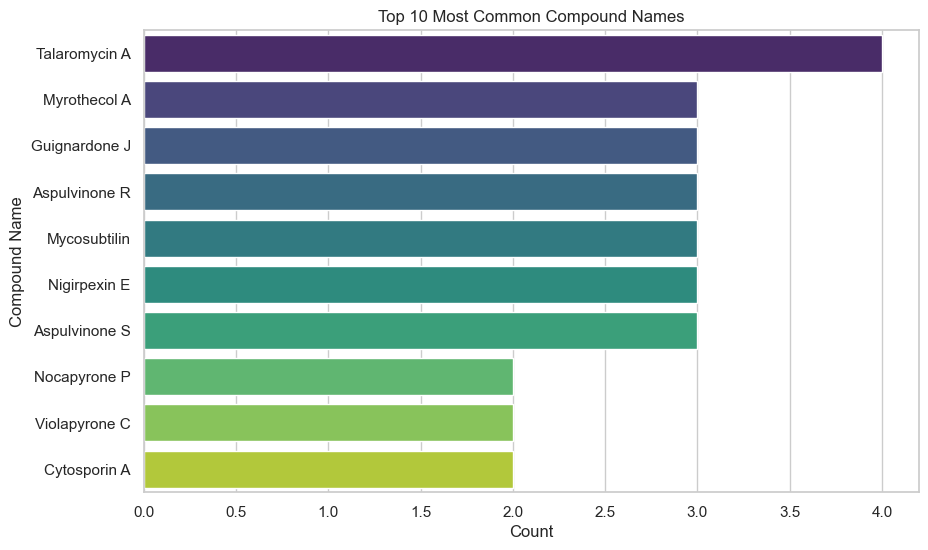

In [47]:
df_cleaned_not_names = df_cleaned[df_cleaned.compound_name != "Not named"]
common_compound_names = df_cleaned_not_names['compound_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.tight_layout()
sns.set_theme(style="whitegrid")
sns.barplot(x=common_compound_names.values, y=common_compound_names.index, hue= common_compound_names.index, palette="viridis", legend=False)
plt.title('Top 10 Most Common Compound Names')
plt.xlabel('Count')
plt.ylabel('Compound Name')
plt.show()

### 2. 📈 Top 10 Clusters by Compound Count

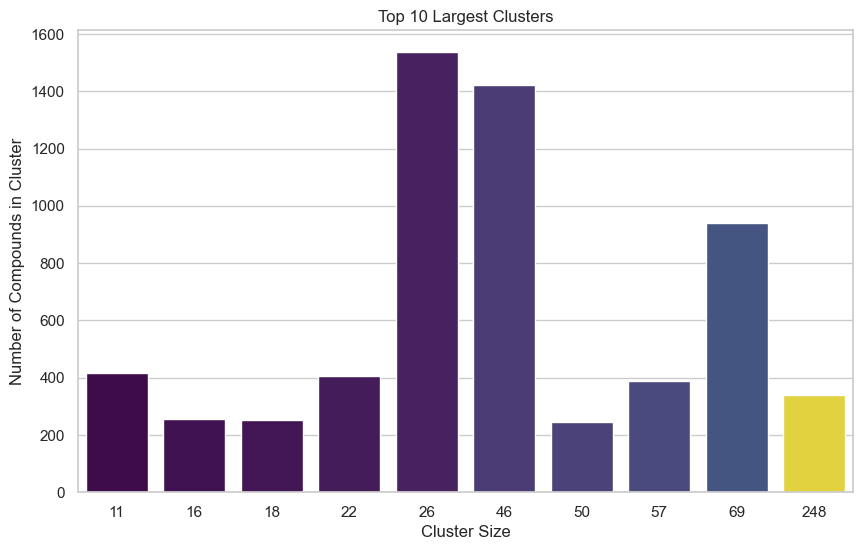

In [48]:
cluster_size = df_cleaned.groupby('compound_cluster_id')['npaid'].count().sort_values(ascending=False).head(10)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.tight_layout()
sns.barplot(x=cluster_size.index, y=cluster_size.values, hue= cluster_size.index, palette="viridis", legend=False)
plt.title("Top 10 Largest Clusters")
plt.xlabel("Cluster Size")
plt.ylabel("Number of Compounds in Cluster")
plt.show()

### 🧬 3. Cluster Size vs Genus Diversity:  Are large clusters more taxonomically diverse?


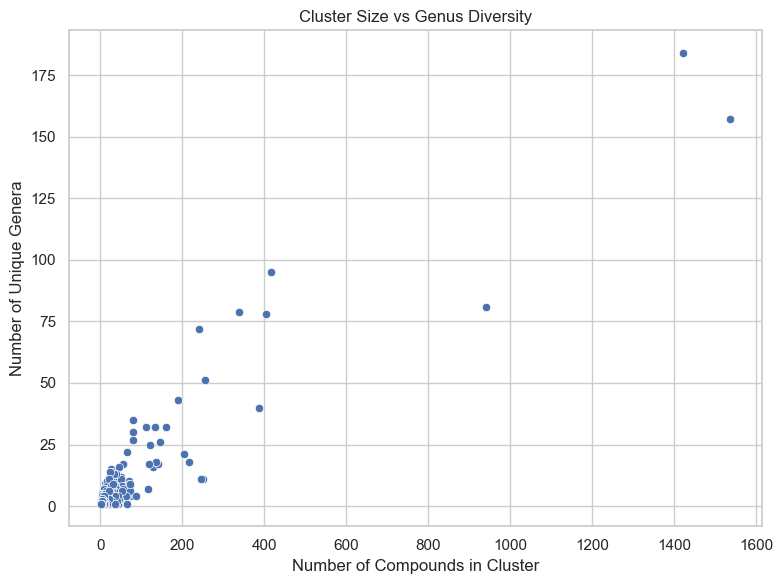

In [49]:
cluster_genus_diversity = df_cleaned.groupby('compound_cluster_id')['genus'].nunique()
cluster_sizes = df_cleaned.groupby('compound_cluster_id')['npaid'].count()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=cluster_sizes, y=cluster_genus_diversity)
plt.xlabel('Number of Compounds in Cluster')
plt.ylabel('Number of Unique Genera')
plt.title('Cluster Size vs Genus Diversity')
plt.tight_layout()
plt.show()


### 🥧 4. Compound Diversity within Clusters

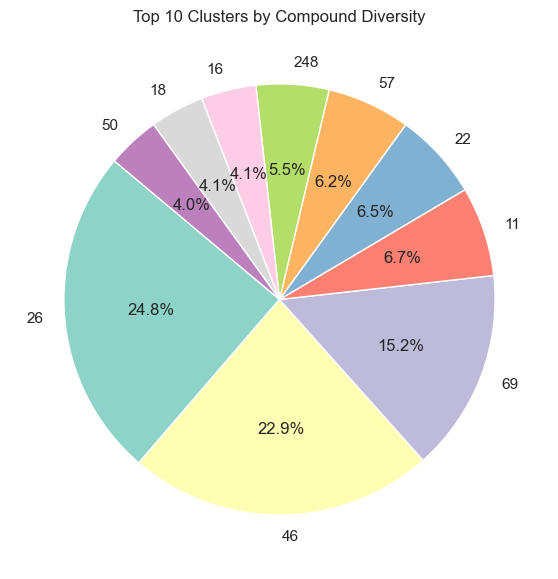

In [50]:
diversity_within_clusters = df_cleaned.groupby('compound_cluster_id')['npaid'].nunique()
cluster_diversity = diversity_within_clusters.sort_values(ascending=False).head(10)

plt.figure(figsize=(7, 7))
plt.pie(cluster_diversity, labels=cluster_diversity.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3', len(cluster_diversity)))
plt.title('Top 10 Clusters by Compound Diversity')
plt.show()

### 🧬 5. Cluster 26 (or 46): Top Origin Genera


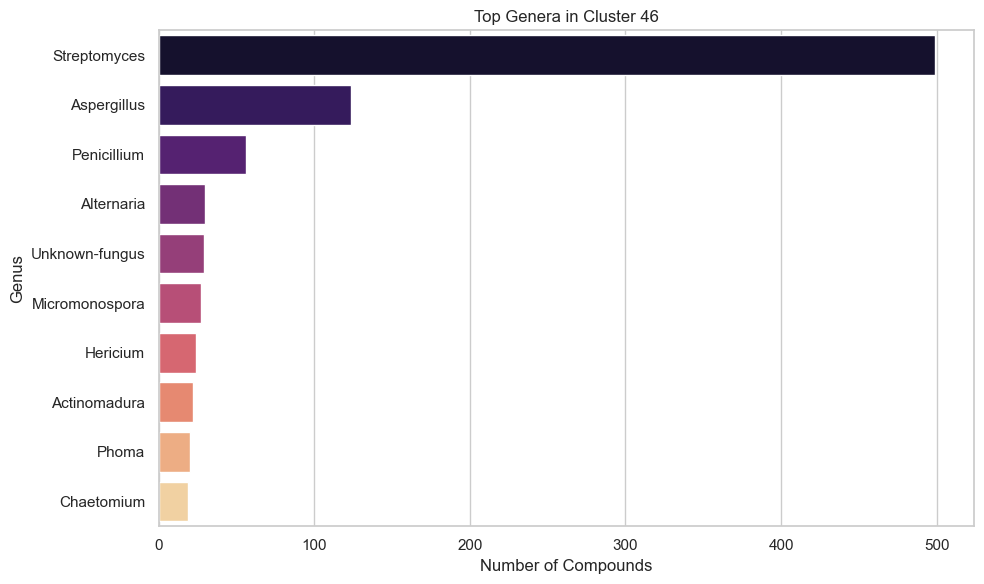

In [51]:
cluster_id = 46
top_genera = df_cleaned[df_cleaned['compound_cluster_id'] == cluster_id]['genus'].value_counts().head(10)
top_genera_df = top_genera.reset_index()
top_genera_df.columns = ['genus', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_genera_df,
    x='count',
    y='genus',
    hue='genus',  
    palette='magma',
    dodge=False,  # avoids side-by-side bars
    legend=False 
)
plt.xlabel('Number of Compounds')
plt.ylabel('Genus')
plt.title(f'Top Genera in Cluster {cluster_id}')
plt.tight_layout()
plt.show()

Mass / Formula / Structure

### 6. ⚖️ Distribution of Molecular Weight

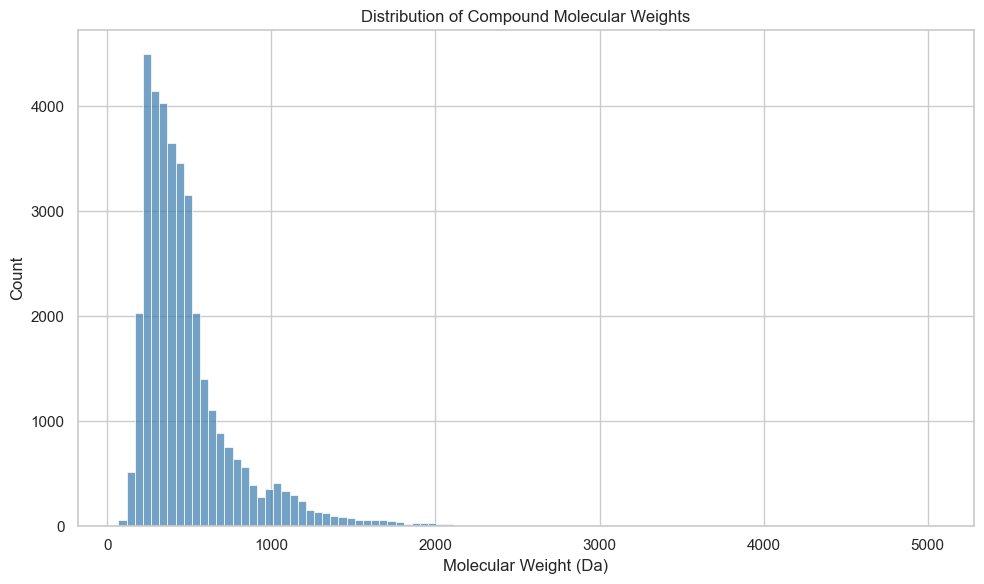

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['compound_molecular_weight'], bins=100, color='steelblue')
plt.xlabel('Molecular Weight (Da)')
plt.ylabel('Count')
plt.title('Distribution of Compound Molecular Weights')
plt.tight_layout()
plt.show()

### 7. ⚙️ Difference Between Accurate Mass and m+H / m+Na

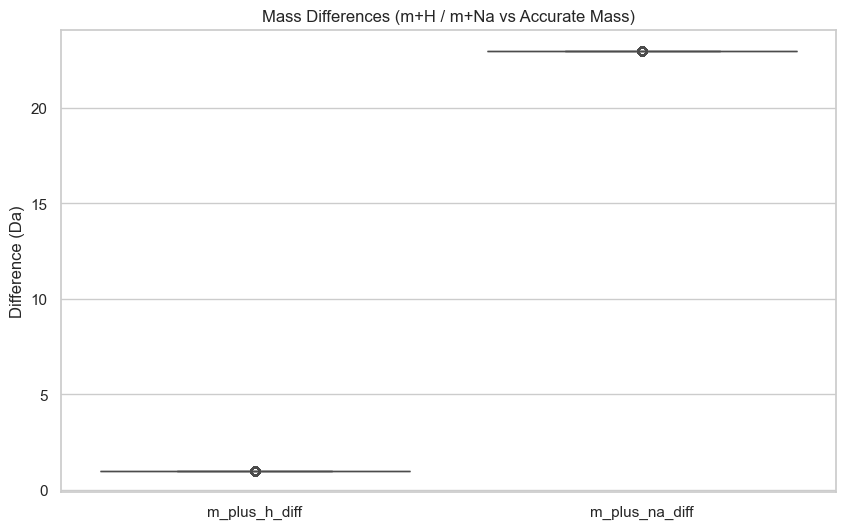

In [53]:
# Create a temporary DataFrame just for plotting
diffs = pd.DataFrame({
    'm_plus_h_diff': m_plus_h_diff,
    'm_plus_na_diff': m_plus_na_diff
})

# Now plot
plt.figure(figsize=(10, 6))
plt.tight_layout()
sns.boxplot(data=diffs)
plt.title("Mass Differences (m+H / m+Na vs Accurate Mass)")
plt.ylabel("Difference (Da)")
plt.show()

Origin Type, Species, Genus


### 8. 🌱 Top Origin Types

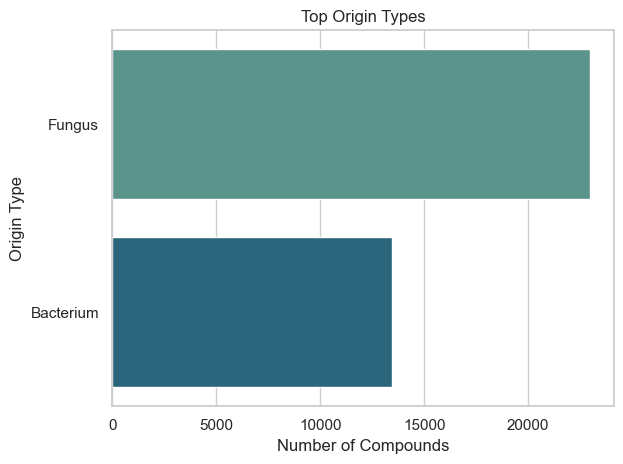

<Figure size 1000x600 with 0 Axes>

In [54]:
origin_counts = df_cleaned['origin_type'].value_counts().head(10)
sns.barplot(x=origin_counts.values, y=origin_counts.index, hue=origin_counts.index, palette="crest", legend=False)
plt.title("Top Origin Types")
plt.xlabel("Number of Compounds")
plt.ylabel("Origin Type")
plt.tight_layout()
plt.figure(figsize=(10, 6))
plt.show()

### 🌱 9. Top Origin Species

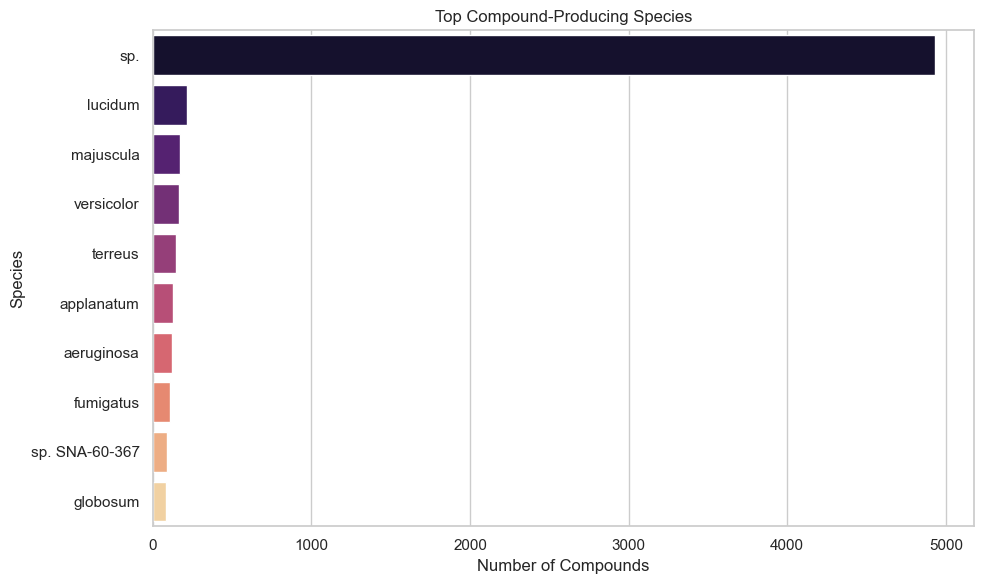

In [55]:
species_counts = df_cleaned['origin_species'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=species_counts.values, y=species_counts.index, hue=species_counts.index, palette="magma", legend=False)
plt.xlabel('Number of Compounds')
plt.ylabel('Species')
plt.title('Top Compound-Producing Species')
plt.tight_layout()
plt.show()


### 10. 🍃 Top Genera

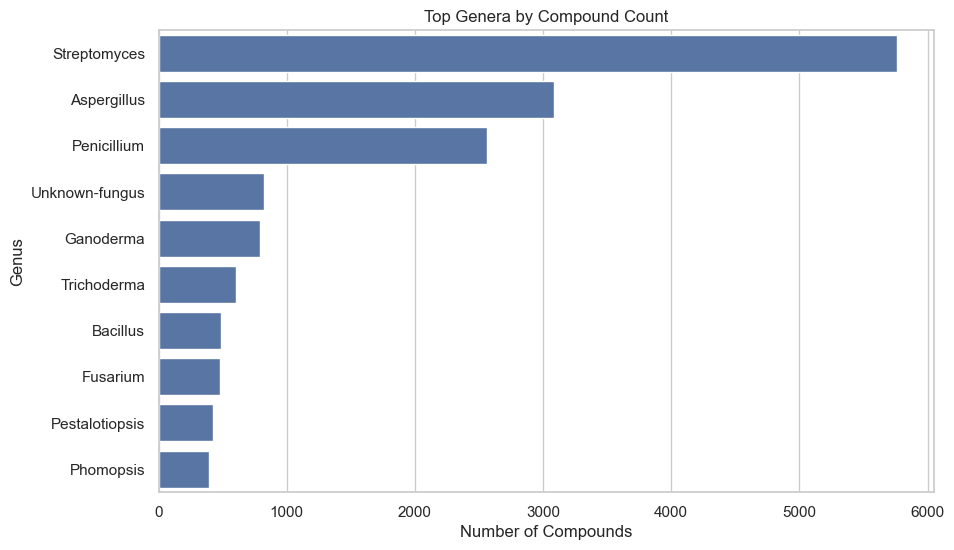

In [56]:
genus_counts = df_cleaned['genus'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.tight_layout()
sns.barplot(x=genus_counts.values, y=genus_counts.index)
plt.title("Top Genera by Compound Count")
plt.xlabel("Number of Compounds")
plt.ylabel("Genus")
plt.show()

InChIKey Analysis

### 11. 🧬 Number of Duplicate InChIKeys

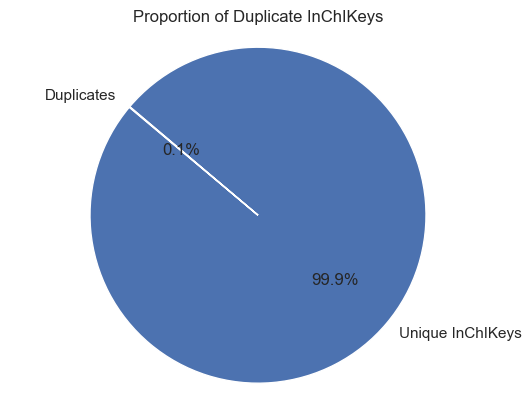

In [57]:
dup_inchis = df_cleaned['compound_inchikey'].duplicated().sum()
labels = ['Unique InChIKeys', 'Duplicates']
sizes = [len(df_cleaned) - dup_inchis, dup_inchis]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Proportion of Duplicate InChIKeys")
plt.axis('equal')
plt.show()


### 12. 📊 Number of Conflicting InChIKeys per Type

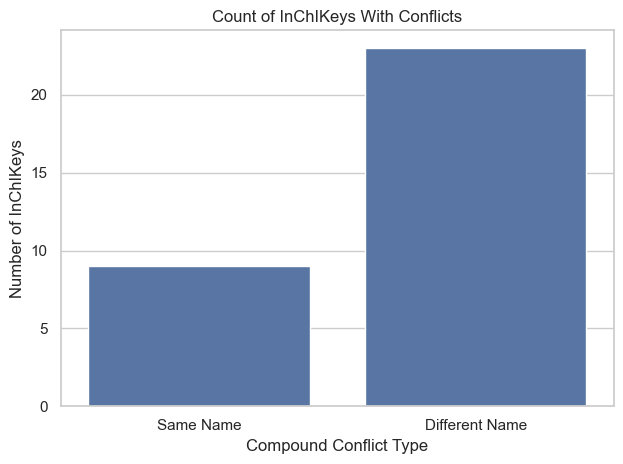

<Figure size 1000x600 with 0 Axes>

In [58]:
same_name_count = inconsistencies[inconsistencies['compound_name'] == 1].shape[0]
diff_name_count = inconsistencies[inconsistencies['compound_name'] > 1].shape[0]

sns.barplot(x=['Same Name', 'Different Name'], y=[same_name_count, diff_name_count])
plt.title("Count of InChIKeys With Conflicts")
plt.ylabel("Number of InChIKeys")
plt.xlabel("Compound Conflict Type")
plt.tight_layout()
plt.figure(figsize=(10, 6))
plt.show()

Reference / DOI Metadata

13. 📘 Original Reference Year Distribution

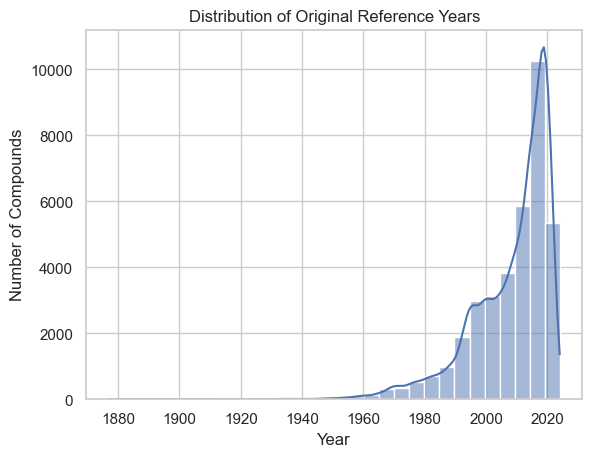

In [59]:
sns.histplot(df_cleaned['original_reference_year'].dropna(), bins=30, kde=True)
plt.title("Distribution of Original Reference Years")
plt.xlabel("Year")
plt.ylabel("Number of Compounds")
plt.show()

### 14. 🧾 Presence of External Metadata

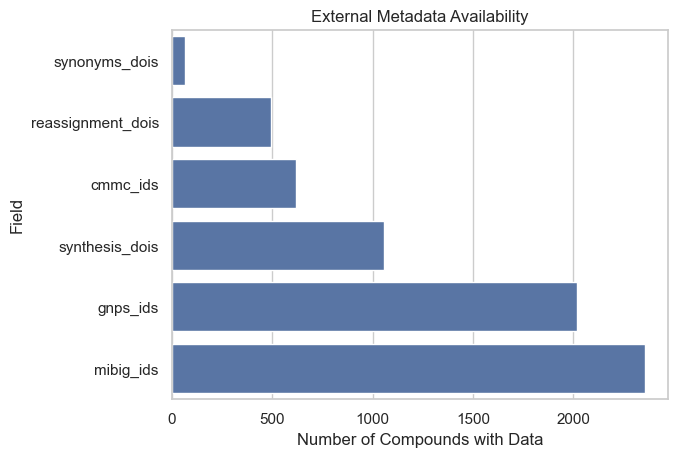

In [60]:
cols = ['synonyms_dois', 'reassignment_dois', 'synthesis_dois', 'mibig_ids', 'gnps_ids', 'cmmc_ids']
presence = df_cleaned[cols].notna().sum().sort_values()

sns.barplot(x=presence.values, y=presence.index)
plt.title("External Metadata Availability")
plt.xlabel("Number of Compounds with Data")
plt.ylabel("Field")
plt.show()


### 15. 🧾 Absense of External Metadata

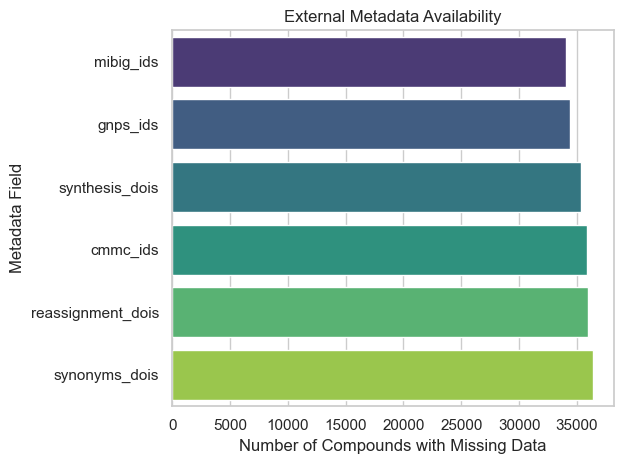

<Figure size 1000x600 with 0 Axes>

In [61]:
cols = ['synonyms_dois', 'reassignment_dois', 'synthesis_dois', 'mibig_ids', 'gnps_ids', 'cmmc_ids']
missing_counts = df_cleaned[cols].isnull().sum().sort_values()

sns.barplot(x=missing_counts.values, y=missing_counts.index, hue = missing_counts.index, palette="viridis", legend=False)
plt.title("External Metadata Availability")
plt.xlabel("Number of Compounds with Missing Data")
plt.ylabel("Metadata Field")
plt.tight_layout()
plt.figure(figsize=(10, 6))
plt.show()

# Creating a test data from original dataframe

In [62]:
test_data = final_df.sample(n = 15, random_state=42).reset_index(drop=True)
test_data

,npaid,compound_name,compound_molecular_formula,compound_molecular_weight,compound_accurate_mass,compound_m_plus_h,compound_m_plus_na,compound_inchi,compound_inchikey,compound_smiles,...,original_reference_type,original_journal_title,synonyms_dois,reassignment_dois,synthesis_dois,mibig_ids,gnps_ids,cmmc_ids,npmrd_id,npatlas_url
0,NPA031115,Asperversiamide B,C39H52N8O8,760.893,760.3908,761.3981,783.38,InChI=1S/C39H52N8O8/c1-20(2)31-38(54)44-28(16-...,ACENDMYPZQLVJT-YQVSMCAWSA-N,CC(C)[C@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)[C@@...,...,article,Chemical Communications,None,None,None,None,None,None,None,https://www.npatlas.org/explore/compounds/NPA0...
1,NPA021892,Acremeremophilane L,C15H18O4,262.305,262.1205,263.1278,285.1097,InChI=1S/C15H18O4/c1-8-4-5-12(16)15(18)7-11-10...,HEZAHRXDYSPIIV-WQLKMTMSSA-N,C[C@H]1C=C[C@@H]([C@@]2([C@@]1(CC3=C(C(=O)OC3=...,...,article,Journal of Natural Products,None,None,None,None,None,None,NP0015230,https://www.npatlas.org/explore/compounds/NPA0...
2,NPA020181,Cytochalasin B3,C29H35NO5,477.601,477.2515,478.2588,500.2407,InChI=1S/C29H35NO5/c1-18-9-7-13-22(31)15-16-25...,ARZLNCVUULQBQG-HBEZZINHSA-N,C[C@@H]1CCCC(=O)/C=C/C(=O)O[C@]23[C@@H](/C=C/C...,...,article,Bioorganic and Medicinal Chemistry Letters,None,None,None,None,None,None,NP0014068,https://www.npatlas.org/explore/compounds/NPA0...
3,NPA022842,Gramillin B,C36H60N8O12S2,861.054,860.3772,861.3845,883.3664,InChI=1S/C36H60N8O12S2/c1-4-5-6-7-8-9-12-21-31...,ABYJOODEAJNHBQ-HRQFAISJSA-N,CCCCCCCC[C@H]1C(=O)N[C@H]2CSSC[C@@H](C(=O)OC(=...,...,article,Journal of the American Chemical Society,None,None,None,['BGC0002178'],None,None,NP0018883,https://www.npatlas.org/explore/compounds/NPA0...
4,NPA007665,Quadrone,C15H20O3,248.322,248.1412,249.1485,271.1304,InChI=1S/C15H20O3/c1-14(2)7-15-9-4-3-8(14)10(1...,BBIDMUQZCCGABN-DWJWARBKSA-N,CC1(C)C[C@@]23[C@@H]4CC(=O)[C@@H]2COC(=O)[C@@H...,...,article,Tetrahedron Letters,None,"[{'reference_doi': '10.1021/np060112p', 'struc...",None,None,['CCMSLIB00012136927%Suspect related to NCGC00...,None,NP0051955,https://www.npatlas.org/explore/compounds/NPA0...
5,NPA025001,Hierridin C,C23H39ClO3,399.015,398.2588,399.2661,421.248,InChI=1S/C23H39ClO3/c1-4-5-6-7-8-9-10-11-12-13...,LOYIDEKETTZLFY-UHFFFAOYSA-N,CCCCCCCCCCCCCCCC1=C(C(=CC(=C1Cl)OC)OC)O,...,article,Journal of Natural Products,None,None,None,None,None,None,NP0019178,https://www.npatlas.org/explore/compounds/NPA0...
6,NPA016486,Trichurusin H/trichurusin I,C25H38O7,450.572,450.2618,451.2691,473.251,InChI=1S/C25H38O7/c1-16(13-20(15-27)10-11-26)6...,AOHWBVWZGFQODA-ADFGBAKSSA-N,CC1C(O1)(C)C[C@H](C)C[C@H](C)[C@@H]2[C@@H](C=C...,...,article,Chemical and Pharmaceutical Bulletin,None,None,None,None,None,None,NP0005972,https://www.npatlas.org/explore/compounds/NPA0...
7,NPA007423,Isohericerin,C27H33NO3,419.565,419.246,420.2533,442.2352,InChI=1S/C27H33NO3/c1-19(2)9-8-10-20(3)13-14-2...,AYUFSIRZXDWSDR-UHFFFAOYSA-N,CC(=CCCC(=CCC1=C(C=C2C(=C1O)CN(C2=O)CCC3=CC=CC...,...,article,Tetrahedron,None,None,['10.1021/acs.joc.7b00920'],None,None,None,NP0229520,https://www.npatlas.org/explore/compounds/NPA0...
8,NPA015271,Miharamycin A,C20H30N10O9,554.521,554.2197,555.227,577.2089,InChI=1S/C20H30N10O9/c21-7(2-1-3-30(37)18(22)2...,QSPCQKVMQODSDN-RRSOCIHNSA-N,N=C(N)N(O)CCCC(N)C(=O)N[C@H](C(=O)O)[C@H]1O[C@...,...,article,Tetrahedron Letters,None,"[{'reference_doi': '10.1002/anie.201905723', '...",None,['BGC0002479'],None,None,None,https://www.npatlas.org/explore/compounds/NPA0...
9,NPA023520,"(24E)-3,4-seco-cucurbita-4,24-diene-3-hydroxy-...",C30H48O5,488.709,488.3502,489.3575,511.3394,InChI=1S/C30H48O5/c1-19(9-7-10-20(2)26(32)33)2...,ATZQJRLRJKPHQB-ZECBZNPZSA-N,C[C@H](CC/C=C(\C)/C(=O)O)[C@H]1CC[C@@]2([C@@]1...,...,article,Phytochemistry,None,None,None,None,None,None,NP0015346,https://www.npatlas.org/explore/compounds/NPA0...
